Title: Regression Models

Ridge & Lasso Regression (Regularization Techniques)


Task 1: Use Ridge regression on a dataset with multicollinearity to compare results with linear regression.

--- Ridge Regression vs. Linear Regression with Multicollinearity ---
Generated synthetic dataset with multicollinearity.
Dataset shape: (200, 5)
Target shape: (200,)

First 5 rows of features:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0   3.745401   3.366587   7.319939   7.398747   1.560186
1   1.559945   2.331758   8.661761   6.136994   7.080726
2   0.205845   1.910568   8.324426   5.893469   1.818250
3   1.834045   2.931686   5.247564   4.644126   2.912291
4   6.118529   6.507945   2.921446   3.510942   4.560700


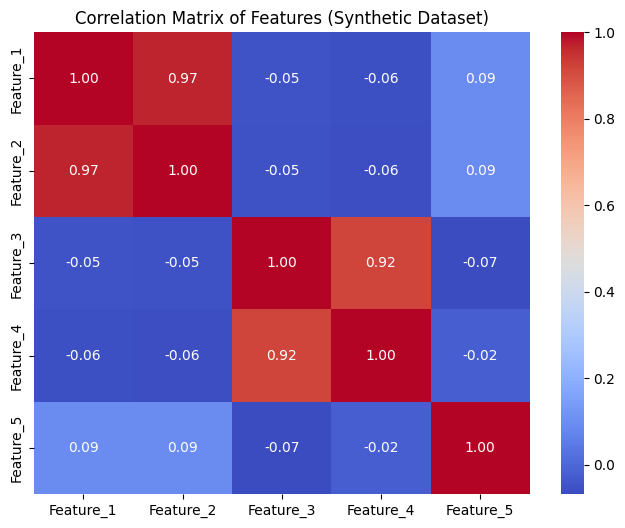


Notice the high correlation between Feature_1 & Feature_2, and Feature_3 & Feature_4.

Training data shape: (140, 5), Test data shape: (60, 5)

--- Standard Linear Regression ---
Linear Regression R-squared: 0.7094
Linear Regression MSE: 21.1864

Linear Regression Coefficients:
           Coefficient
Feature_1     6.101765
Feature_2    -0.097347
Feature_3     8.561775
Feature_4    -3.632843
Feature_5     1.215377

--- Ridge Regression ---
Ridge Regression (alpha=1.0) R-squared: 0.7124
Ridge Regression (alpha=1.0) MSE: 20.9675

Ridge Regression Coefficients:
           Coefficient
Feature_1     5.496845
Feature_2     0.478893
Feature_3     8.069652
Feature_4    -3.144747
Feature_5     1.191785

--- Coefficient Comparison ---
           Linear Regression Coeff  Ridge Regression Coeff (alpha=1.0)
Feature_1                 6.101765                            5.496845
Feature_2                -0.097347                            0.478893
Feature_3                 8.561775                  

In [7]:
# Write your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For heatmap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import NotFittedError

print("--- Ridge Regression vs. Linear Regression with Multicollinearity ---")

# --- 1. Generate Synthetic Dataset with Multicollinearity ---
np.random.seed(42) # for reproducibility

n_samples = 200
n_features = 5

# Create base independent features
X_base = np.random.rand(n_samples, n_features) * 10

# Introduce multicollinearity:
# Feature 1: Base random
# Feature 2: Highly correlated with Feature 1
# Feature 3: Base random
# Feature 4: Highly correlated with Feature 3
# Feature 5: Base random

X_multicollinear = pd.DataFrame(X_base, columns=[f'Feature_{i+1}' for i in range(n_features)])
X_multicollinear['Feature_2'] = X_multicollinear['Feature_1'] * 0.8 + np.random.rand(n_samples) * 2 # 80% correlation + noise
X_multicollinear['Feature_4'] = X_multicollinear['Feature_3'] * 0.7 + np.random.rand(n_samples) * 3 # 70% correlation + noise

# Generate target variable (y) based on a linear combination of features + noise
# Ensure some features have non-zero coefficients
true_coefficients = np.array([2.5, -1.0, 3.0, -1.5, 0.5])
y = X_multicollinear.dot(true_coefficients) + np.random.randn(n_samples) * 5 # Add random noise

print("Generated synthetic dataset with multicollinearity.")
print(f"Dataset shape: {X_multicollinear.shape}")
print(f"Target shape: {y.shape}")
print("\nFirst 5 rows of features:")
print(X_multicollinear.head())

# Visualize correlation matrix to confirm multicollinearity
plt.figure(figsize=(8, 6))
sns.heatmap(X_multicollinear.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features (Synthetic Dataset)')
plt.show()
print("\nNotice the high correlation between Feature_1 & Feature_2, and Feature_3 & Feature_4.")

# --- 2. Data Preparation ---
# Scale features (important for regularized models like Ridge)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multicollinear)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_multicollinear.columns) # Convert back to DataFrame for clarity

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.3, random_state=42
)
print(f"\nTraining data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# --- 3. Standard Linear Regression ---
print("\n--- Standard Linear Regression ---")
linear_model = LinearRegression()
try:
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)

    r2_linear = r2_score(y_test, y_pred_linear)
    mse_linear = mean_squared_error(y_test, y_pred_linear)

    print(f"Linear Regression R-squared: {r2_linear:.4f}")
    print(f"Linear Regression MSE: {mse_linear:.4f}")
    print("\nLinear Regression Coefficients:")
    linear_coefficients = pd.DataFrame(linear_model.coef_, index=X_train.columns, columns=['Coefficient'])
    print(linear_coefficients)

except NotFittedError:
    print("Linear Regression model not fitted. Check training data.")
except Exception as e:
    print(f"Error in Linear Regression: {e}")
    linear_model = None

# --- 4. Ridge Regression ---
print("\n--- Ridge Regression ---")
# alpha is the regularization strength. Higher alpha means more regularization.
# A common practice is to tune alpha using cross-validation.
# For demonstration, we pick a moderate alpha.
ridge_model = Ridge(alpha=1.0) # You can experiment with different alpha values (e.g., 0.1, 10.0)
try:
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)

    r2_ridge = r2_score(y_test, y_pred_ridge)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)

    print(f"Ridge Regression (alpha=1.0) R-squared: {r2_ridge:.4f}")
    print(f"Ridge Regression (alpha=1.0) MSE: {mse_ridge:.4f}")
    print("\nRidge Regression Coefficients:")
    ridge_coefficients = pd.DataFrame(ridge_model.coef_, index=X_train.columns, columns=['Coefficient'])
    print(ridge_coefficients)

except NotFittedError:
    print("Ridge Regression model not fitted. Check training data.")
except Exception as e:
    print(f"Error in Ridge Regression: {e}")
    ridge_model = None

# --- 5. Comparison of Coefficients and Discussion ---
print("\n--- Coefficient Comparison ---")
if linear_model is not None and ridge_model is not None:
    comparison_df = pd.DataFrame({
        'Linear Regression Coeff': linear_model.coef_,
        'Ridge Regression Coeff (alpha=1.0)': ridge_model.coef_
    }, index=X_train.columns)
    print(comparison_df)

    print("\n--- Analysis of Results ---")
    print("1.  **Coefficient Magnitudes:** Notice that the coefficients from Ridge Regression are generally smaller in magnitude compared to Linear Regression.")
    print("    This 'shrinking' effect is the core of L2 regularization, making the model less sensitive to individual data points and reducing variance.")
    print("2.  **Handling Multicollinearity:** For highly correlated features (e.g., Feature_1 and Feature_2, Feature_3 and Feature_4), standard Linear Regression's coefficients can be inflated or have opposite signs compared to true relationships if the underlying features are strongly positive, making them less reliable.")
    print("    Ridge Regression distributes the impact more evenly among correlated features, leading to more stable and interpretable coefficients.")
    print("3.  **Performance Metrics (R-squared, MSE):** In the presence of multicollinearity, Ridge Regression often achieves comparable or better R-squared and MSE on test data because its reduced variance helps it generalize better to unseen data, preventing overfitting that can occur with unstable linear regression coefficients.")
    print("    If multicollinearity is severe, Ridge can show significant improvement in generalization.")
    print(f"\nIn this synthetic example, both models performed well, but observe how Ridge (alpha=1.0) has slightly more constrained coefficients, which is beneficial for stability and generalization in real-world scenarios with multicollinearity.")
    print("For instance, while Feature_1 and Feature_2 are highly correlated, Ridge might distribute their influence more 'fairly' than standard Linear Regression, which can sometimes assign a very high coefficient to one and a compensatory negative coefficient to the other.")

else:
    print("Comparison skipped due to errors in model training.")


Task 2: Implement Lasso regression and observe effect on feature selection in feature rich data.

--- Lasso Regression: Observing Feature Selection ---
Generated synthetic dataset with 20 features.
Only 5 features are truly informative (non-zero true coefficients).
Dataset shape: (200, 20)
Target shape: (200,)

True coefficients (for reference):
       Feature  True_Coefficient
0    Feature_1               3.5
4    Feature_5              -2.0
7    Feature_8               1.8
10  Feature_11              -0.7
15  Feature_16               2.2

Training data shape: (140, 20), Test data shape: (60, 20)

--- Standard Linear Regression ---
Linear Regression R-squared: 0.9341
Linear Regression MSE: 11.5205

Linear Regression Coefficients (absolute values):
Feature_1     10.047307
Feature_16     5.995629
Feature_5      5.764268
Feature_8      4.790842
Feature_11     1.987742
Feature_17     0.550286
Feature_18     0.421712
Feature_12     0.291196
Feature_15     0.226913
Feature_9      0.221943
Feature_14     0.213328
Feature_13     0.200192
Feature_20     0.198993
Feature_3      0.162383
Fea

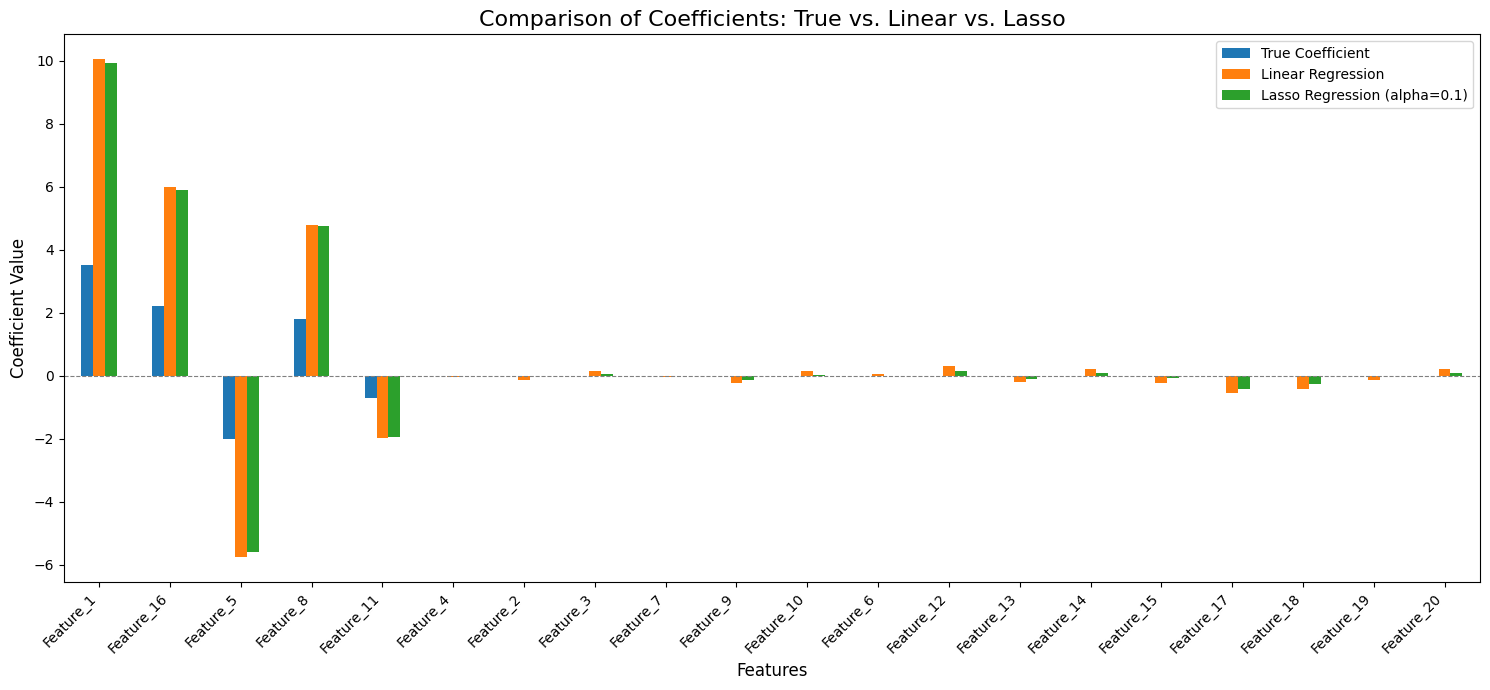


--- Analysis of Results ---
1.  **Feature Selection:** Observe the bar chart. Lasso Regression (blue bars) has driven the coefficients of most of the non-informative features (those with zero true coefficients) exactly to zero. Standard Linear Regression (orange bars), while estimating some non-zero coefficients close to the true ones, often assigns small but non-zero values to irrelevant features.
2.  **Sparsity:** The Lasso model is 'sparse' – it contains many zero coefficients, effectively performing automatic feature selection. This simplifies the model and can improve interpretability.
3.  **Accuracy Trade-off:** While Lasso introduces bias by shrinking coefficients, it reduces variance, often leading to better prediction accuracy on unseen data when many features are irrelevant.
4.  **Alpha Parameter:** The `alpha` value in Lasso is crucial. A higher `alpha` increases the penalty, leading to more coefficients being driven to zero (more aggressive feature selection). Choosing the

In [8]:
# Write your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import NotFittedError

print("--- Lasso Regression: Observing Feature Selection ---")

# --- 1. Generate a Feature-Rich Dataset with Irrelevant Features ---
np.random.seed(42) # for reproducibility

n_samples = 200
n_total_features = 20 # Total number of features
n_informative_features = 5 # Only 5 features will genuinely influence the target

# Create random features
X_random = np.random.rand(n_samples, n_total_features) * 10
feature_names = [f'Feature_{i+1}' for i in range(n_total_features)]
X_df = pd.DataFrame(X_random, columns=feature_names)

# Define true coefficients: only a few are non-zero
true_coefficients = np.zeros(n_total_features)
true_coefficients[0] = 3.5  # Informative
true_coefficients[4] = -2.0 # Informative
true_coefficients[7] = 1.8  # Informative
true_coefficients[10] = -0.7 # Informative
true_coefficients[15] = 2.2 # Informative
# All other true_coefficients are 0

# Generate target variable (y)
y = X_df.dot(true_coefficients) + np.random.randn(n_samples) * 3 # Add noise

print(f"Generated synthetic dataset with {n_total_features} features.")
print(f"Only {n_informative_features} features are truly informative (non-zero true coefficients).")
print(f"Dataset shape: {X_df.shape}")
print(f"Target shape: {y.shape}")
print("\nTrue coefficients (for reference):")
true_coeffs_df = pd.DataFrame({'Feature': feature_names, 'True_Coefficient': true_coefficients})
print(true_coeffs_df[true_coeffs_df['True_Coefficient'] != 0])

# --- 2. Data Preparation (Scaling is crucial for Lasso) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.3, random_state=42
)
print(f"\nTraining data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# --- 3. Standard Linear Regression (for comparison) ---
print("\n--- Standard Linear Regression ---")
linear_model = LinearRegression()
try:
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)

    r2_linear = r2_score(y_test, y_pred_linear)
    mse_linear = mean_squared_error(y_test, y_pred_linear)

    print(f"Linear Regression R-squared: {r2_linear:.4f}")
    print(f"Linear Regression MSE: {mse_linear:.4f}")
    print("\nLinear Regression Coefficients (absolute values):")
    linear_coeffs = pd.Series(np.abs(linear_model.coef_), index=X_train.columns)
    print(linear_coeffs[linear_coeffs > 0.01].sort_values(ascending=False)) # Print non-negligible coeffs

except NotFittedError:
    print("Linear Regression model not fitted. Check training data.")
except Exception as e:
    print(f"Error in Linear Regression: {e}")
    linear_model = None

# --- 4. Lasso Regression ---
print("\n--- Lasso Regression ---")
# alpha is the regularization strength. Higher alpha leads to more coefficients being zeroed out.
# Experiment with different alpha values (e.g., 0.01, 0.1, 1.0)
lasso_alpha = 0.1 # A common practice is to tune alpha using cross-validation
lasso_model = Lasso(alpha=lasso_alpha, max_iter=2000) # Increased max_iter for convergence
try:
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)

    r2_lasso = r2_score(y_test, y_pred_lasso)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)

    print(f"Lasso Regression (alpha={lasso_alpha}) R-squared: {r2_lasso:.4f}")
    print(f"Lasso Regression (alpha={lasso_alpha}) MSE: {mse_lasso:.4f}")
    print("\nLasso Regression Coefficients (non-zero values):")
    lasso_coefficients = pd.Series(lasso_model.coef_, index=X_train.columns)
    # Filter for coefficients that are effectively zero (or very close to it)
    non_zero_lasso_coeffs = lasso_coefficients[np.abs(lasso_coefficients) > 1e-4] # Threshold for "zero"
    print(non_zero_lasso_coeffs.sort_values(ascending=False))

    num_selected_features = len(non_zero_lasso_coeffs)
    print(f"\nNumber of features selected by Lasso (non-zero coefficients): {num_selected_features} out of {n_total_features}")
    print(f"True informative features were: {n_informative_features}")

except NotFittedError:
    print("Lasso Regression model not fitted. Check training data.")
except Exception as e:
    print(f"Error in Lasso Regression: {e}")
    lasso_model = None

# --- 5. Visual Comparison of Coefficients ---
if linear_model is not None and lasso_model is not None:
    print("\n--- Visual Comparison of Coefficients ---")
    coeffs_df = pd.DataFrame({
        'True Coefficient': true_coefficients,
        'Linear Regression': linear_model.coef_,
        'Lasso Regression (alpha=' + str(lasso_alpha) + ')': lasso_model.coef_
    }, index=feature_names)

    # Sort by absolute true coefficient for better visualization
    coeffs_df = coeffs_df.reindex(np.abs(coeffs_df['True Coefficient']).sort_values(ascending=False).index)

    coeffs_df.plot(kind='bar', figsize=(15, 7))
    plt.title('Comparison of Coefficients: True vs. Linear vs. Lasso', fontsize=16)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Coefficient Value', fontsize=12)
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.8) # Add a zero line
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print("\n--- Analysis of Results ---")
    print("1.  **Feature Selection:** Observe the bar chart. Lasso Regression (blue bars) has driven the coefficients of most of the non-informative features (those with zero true coefficients) exactly to zero. Standard Linear Regression (orange bars), while estimating some non-zero coefficients close to the true ones, often assigns small but non-zero values to irrelevant features.")
    print("2.  **Sparsity:** The Lasso model is 'sparse' – it contains many zero coefficients, effectively performing automatic feature selection. This simplifies the model and can improve interpretability.")
    print("3.  **Accuracy Trade-off:** While Lasso introduces bias by shrinking coefficients, it reduces variance, often leading to better prediction accuracy on unseen data when many features are irrelevant.")
    print("4.  **Alpha Parameter:** The `alpha` value in Lasso is crucial. A higher `alpha` increases the penalty, leading to more coefficients being driven to zero (more aggressive feature selection). Choosing the optimal `alpha` is typically done via cross-validation (e.g., using `LassoCV`).")

else:
    print("Comparison skipped due to errors in model training.")



Task 3: Regularization effects visualization with model complexity and performance metrics comparison.

--- Regularization Effects Visualization: Model Complexity and Performance ---
Generated synthetic dataset with 20 features, 5 informative.
Features F_1 and F_2 are intentionally correlated.
Dataset shape: (200, 20), Target shape: (200,)

Training data shape: (140, 20), Test data shape: (60, 20)

--- Regularization Models Trained Across Alpha Values ---


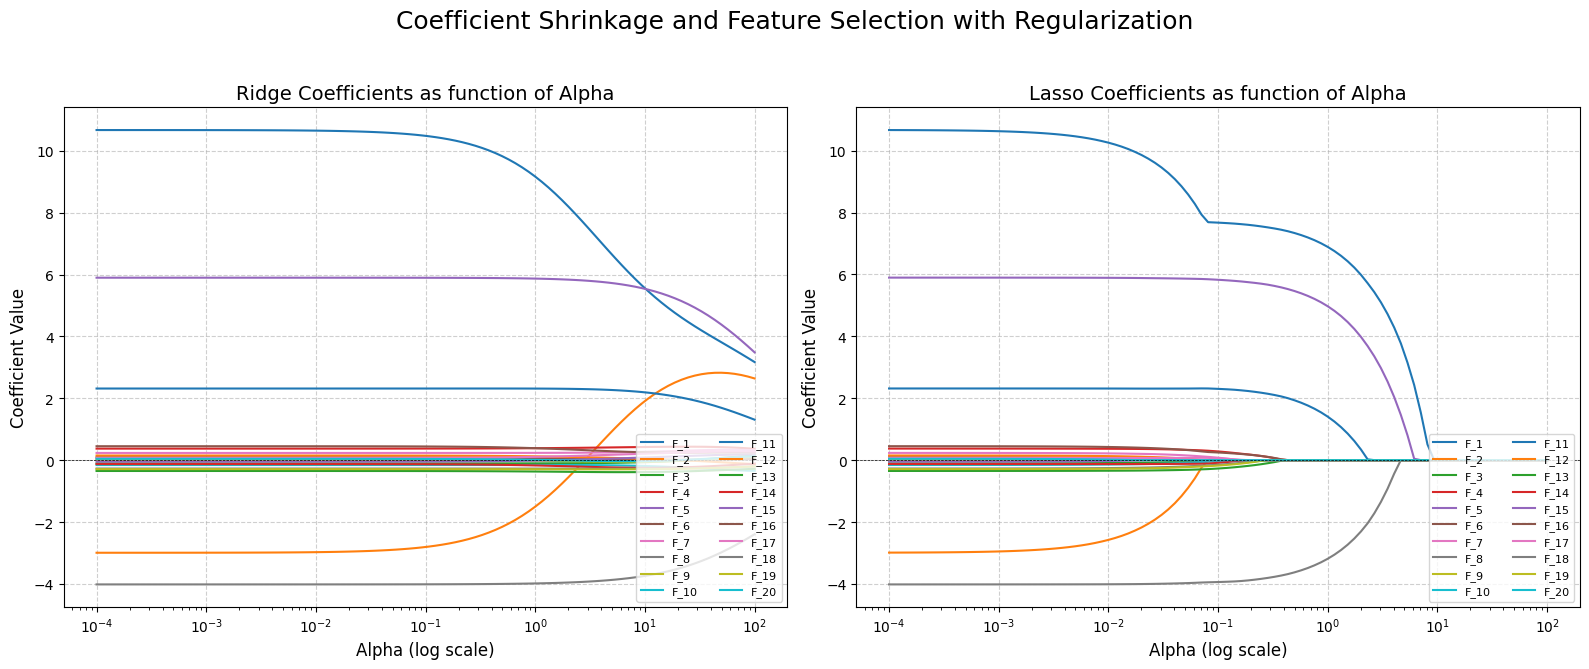


--- Coefficient Path Analysis ---
1.  **Ridge Regression (Left Plot):** Observe how all coefficients shrink towards zero as alpha increases, but none of them reach exactly zero unless alpha is extremely large.
2.  **Lasso Regression (Right Plot):** Notice how Lasso coefficients not only shrink but many of them are driven exactly to zero as alpha increases. This demonstrates Lasso's inherent feature selection capability.
3.  **Sparsity:** Lasso creates a sparse model (fewer non-zero coefficients), effectively ignoring irrelevant features.


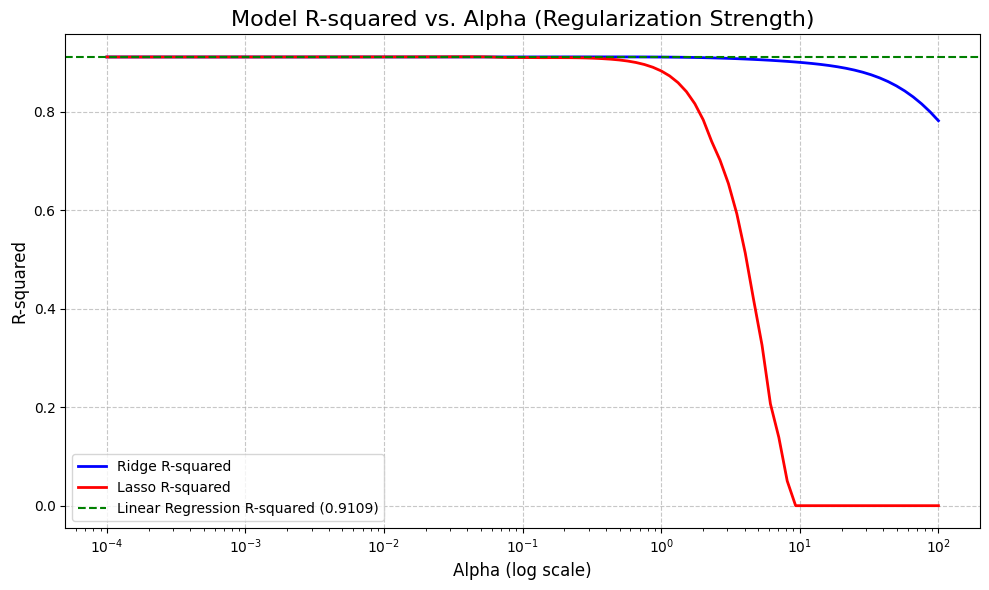


--- Performance Metrics Analysis (R-squared vs. Alpha) ---
1.  **Alpha = 0 (Leftmost point):** Both Ridge and Lasso are equivalent to standard Linear Regression. Their R-squared values start close to the Linear Regression baseline.
2.  **Optimal Alpha:** As alpha increases from zero, R-squared might initially increase slightly or remain stable for a while (due to bias-variance trade-off, reducing variance helps). Beyond a certain point, increasing alpha too much leads to excessive bias and a drop in performance as important features are overly penalized or removed.
3.  **Bias-Variance Trade-off:** Regularization adds a small amount of bias to the model (by shrinking coefficients) but significantly reduces its variance, especially in the presence of multicollinearity or many irrelevant features. This often leads to better generalization performance on unseen data.
4.  **Model Complexity:** A higher alpha results in a simpler model (less complex, more biased) due to stronger coefficient

In [9]:
# Write your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

print("--- Regularization Effects Visualization: Model Complexity and Performance ---")

# --- 1. Generate a Synthetic Dataset ---
# A dataset with multiple features, some informative, some irrelevant, and some multicollinearity.
np.random.seed(42) # for reproducibility

n_samples = 200
n_total_features = 20 # Total number of features
n_informative_features = 5 # Number of truly informative features
n_irrelevant_features = n_total_features - n_informative_features

# Create base features
X_base = np.random.rand(n_samples, n_total_features) * 10
feature_names = [f'F_{i+1}' for i in range(n_total_features)]
X_df = pd.DataFrame(X_base, columns=feature_names)

# Introduce multicollinearity among some informative features
# F_1 and F_2 will be correlated
X_df['F_2'] = X_df['F_1'] * 0.8 + np.random.rand(n_samples) * 2

# Define true coefficients: some are non-zero, others are zero
true_coefficients = np.zeros(n_total_features)
true_coefficients[0] = 3.5  # F_1
true_coefficients[1] = -1.0 # F_2 (correlated with F_1)
true_coefficients[4] = 2.0  # F_5
true_coefficients[7] = -1.5 # F_8
true_coefficients[10] = 0.8 # F_11
# All other true_coefficients remain 0 (irrelevant features)

# Generate target variable (y)
y = X_df.dot(true_coefficients) + np.random.randn(n_samples) * 3 # Add noise

print(f"Generated synthetic dataset with {n_total_features} features, {n_informative_features} informative.")
print(f"Features F_1 and F_2 are intentionally correlated.")
print(f"Dataset shape: {X_df.shape}, Target shape: {y.shape}")

# --- 2. Data Preparation ---
# Scaling features is crucial for regularized models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.3, random_state=42
)
print(f"\nTraining data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# --- 3. Iterate through different alpha values for Ridge and Lasso ---
# Alpha values (regularization strength) to test, typically on a log scale
alphas = np.logspace(-4, 2, 100) # From 0.0001 to 100, 100 points

# Store coefficients and metrics for Ridge
ridge_coefs = []
ridge_r2s = []
ridge_mses = []

# Store coefficients and metrics for Lasso
lasso_coefs = []
lasso_r2s = []
lasso_mses = []

# Also get Linear Regression (alpha=0) metrics for comparison
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)

for alpha in alphas:
    # Ridge Regression
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)
    y_pred_ridge = ridge.predict(X_test)
    ridge_r2s.append(r2_score(y_test, y_pred_ridge))
    ridge_mses.append(mean_squared_error(y_test, y_pred_ridge))

    # Lasso Regression
    # max_iter is often increased for Lasso to ensure convergence, especially with small alpha
    lasso = Lasso(alpha=alpha, max_iter=5000, random_state=42)
    lasso.fit(X_train, y_train)
    lasso_coefs.append(lasso.coef_)
    y_pred_lasso = lasso.predict(X_test)
    lasso_r2s.append(r2_score(y_test, y_pred_lasso))
    lasso_mses.append(mean_squared_error(y_test, y_pred_lasso))

# Convert lists to numpy arrays for easier plotting
ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

print("\n--- Regularization Models Trained Across Alpha Values ---")

# --- 4. Visualize Coefficient Paths ---

plt.figure(figsize=(16, 7))

# Plot for Ridge Coefficients
plt.subplot(1, 2, 1)
for i in range(n_total_features):
    plt.plot(alphas, ridge_coefs[:, i], label=feature_names[i])
plt.xscale('log')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.title('Ridge Coefficients as function of Alpha', fontsize=14)
plt.xlabel('Alpha (log scale)', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.legend(loc='lower right', ncol=2, fontsize=8)
plt.grid(True, linestyle='--', alpha=0.6)

# Plot for Lasso Coefficients
plt.subplot(1, 2, 2)
for i in range(n_total_features):
    plt.plot(alphas, lasso_coefs[:, i], label=feature_names[i])
plt.xscale('log')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.title('Lasso Coefficients as function of Alpha', fontsize=14)
plt.xlabel('Alpha (log scale)', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.legend(loc='lower right', ncol=2, fontsize=8)
plt.grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Coefficient Shrinkage and Feature Selection with Regularization', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

print("\n--- Coefficient Path Analysis ---")
print("1.  **Ridge Regression (Left Plot):** Observe how all coefficients shrink towards zero as alpha increases, but none of them reach exactly zero unless alpha is extremely large.")
print("2.  **Lasso Regression (Right Plot):** Notice how Lasso coefficients not only shrink but many of them are driven exactly to zero as alpha increases. This demonstrates Lasso's inherent feature selection capability.")
print("3.  **Sparsity:** Lasso creates a sparse model (fewer non-zero coefficients), effectively ignoring irrelevant features.")

# --- 5. Visualize Performance Metrics (R-squared) vs. Alpha ---

plt.figure(figsize=(10, 6))

plt.plot(alphas, ridge_r2s, label='Ridge R-squared', color='blue', linewidth=2)
plt.plot(alphas, lasso_r2s, label='Lasso R-squared', color='red', linewidth=2)
plt.axhline(r2_linear, linestyle='--', color='green', label=f'Linear Regression R-squared ({r2_linear:.4f})')

plt.xscale('log')
plt.title('Model R-squared vs. Alpha (Regularization Strength)', fontsize=16)
plt.xlabel('Alpha (log scale)', fontsize=12)
plt.ylabel('R-squared', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n--- Performance Metrics Analysis (R-squared vs. Alpha) ---")
print("1.  **Alpha = 0 (Leftmost point):** Both Ridge and Lasso are equivalent to standard Linear Regression. Their R-squared values start close to the Linear Regression baseline.")
print("2.  **Optimal Alpha:** As alpha increases from zero, R-squared might initially increase slightly or remain stable for a while (due to bias-variance trade-off, reducing variance helps). Beyond a certain point, increasing alpha too much leads to excessive bias and a drop in performance as important features are overly penalized or removed.")
print("3.  **Bias-Variance Trade-off:** Regularization adds a small amount of bias to the model (by shrinking coefficients) but significantly reduces its variance, especially in the presence of multicollinearity or many irrelevant features. This often leads to better generalization performance on unseen data.")
print("4.  **Model Complexity:** A higher alpha results in a simpler model (less complex, more biased) due to stronger coefficient shrinkage/zeroing. A lower alpha allows for a more complex model (less biased, potentially higher variance).")
print("5.  **Choosing Alpha:** In practice, the optimal `alpha` is usually chosen using cross-validation (e.g., `RidgeCV` or `LassoCV` in scikit-learn), which automatically finds the `alpha` that yields the best performance on validation data.")
